In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [8]:
# Build the Sequential feedforward neural network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [44]:
# Build the Sequential convolutional neural network model
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [45]:
# Print the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [46]:
# Define the model optimizer, loss function and metrics
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [48]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [30]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [56]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [50]:
# Print the shape of the training data
train_images

(60000, 28, 28)

In [52]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [58]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

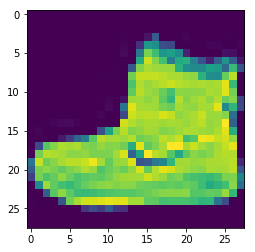

In [60]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()

#### Fit the model

In [63]:
# Fit the model
model.fit(train_images[..., np.newaxis], train_labels, epochs=2, batch_size=256, verbose = 1)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 17s 289us/sample - loss: 1.9803 - accuracy: 0.5771
Epoch 2/2
60000/60000 [==============================] - 17s 280us/sample - loss: 1.7502 - accuracy: 0.6168- loss: 1.7552 - accuracy: 0.61 - ETA: 0s - loss: 1.7547 - ac


#### Plot training history

In [76]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(model.history.history)
df.head()

,loss,accuracy
0,1.980270,0.57710
1,1.750183,0.61675


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

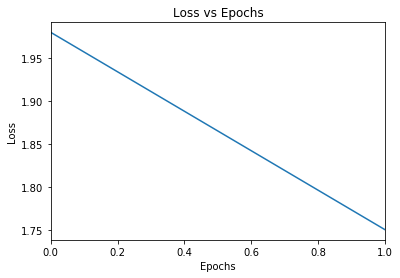

In [77]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [81]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [83]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 2s - loss: 110.5390 - accuracy: 0.2307


[107.97437252197265, 0.2307]

#### Make predictions from the model

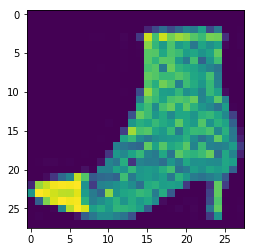

Label: Ankle boot


In [84]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [91]:
# Get the model predictions
prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model Prediction {}".format(np.argmax(prediction)))


Model Prediction 9
